In [26]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import skew
import statsmodels.api as sm
import numpy as np

df = pd.read_csv('microwage.csv')

Removing Outliers

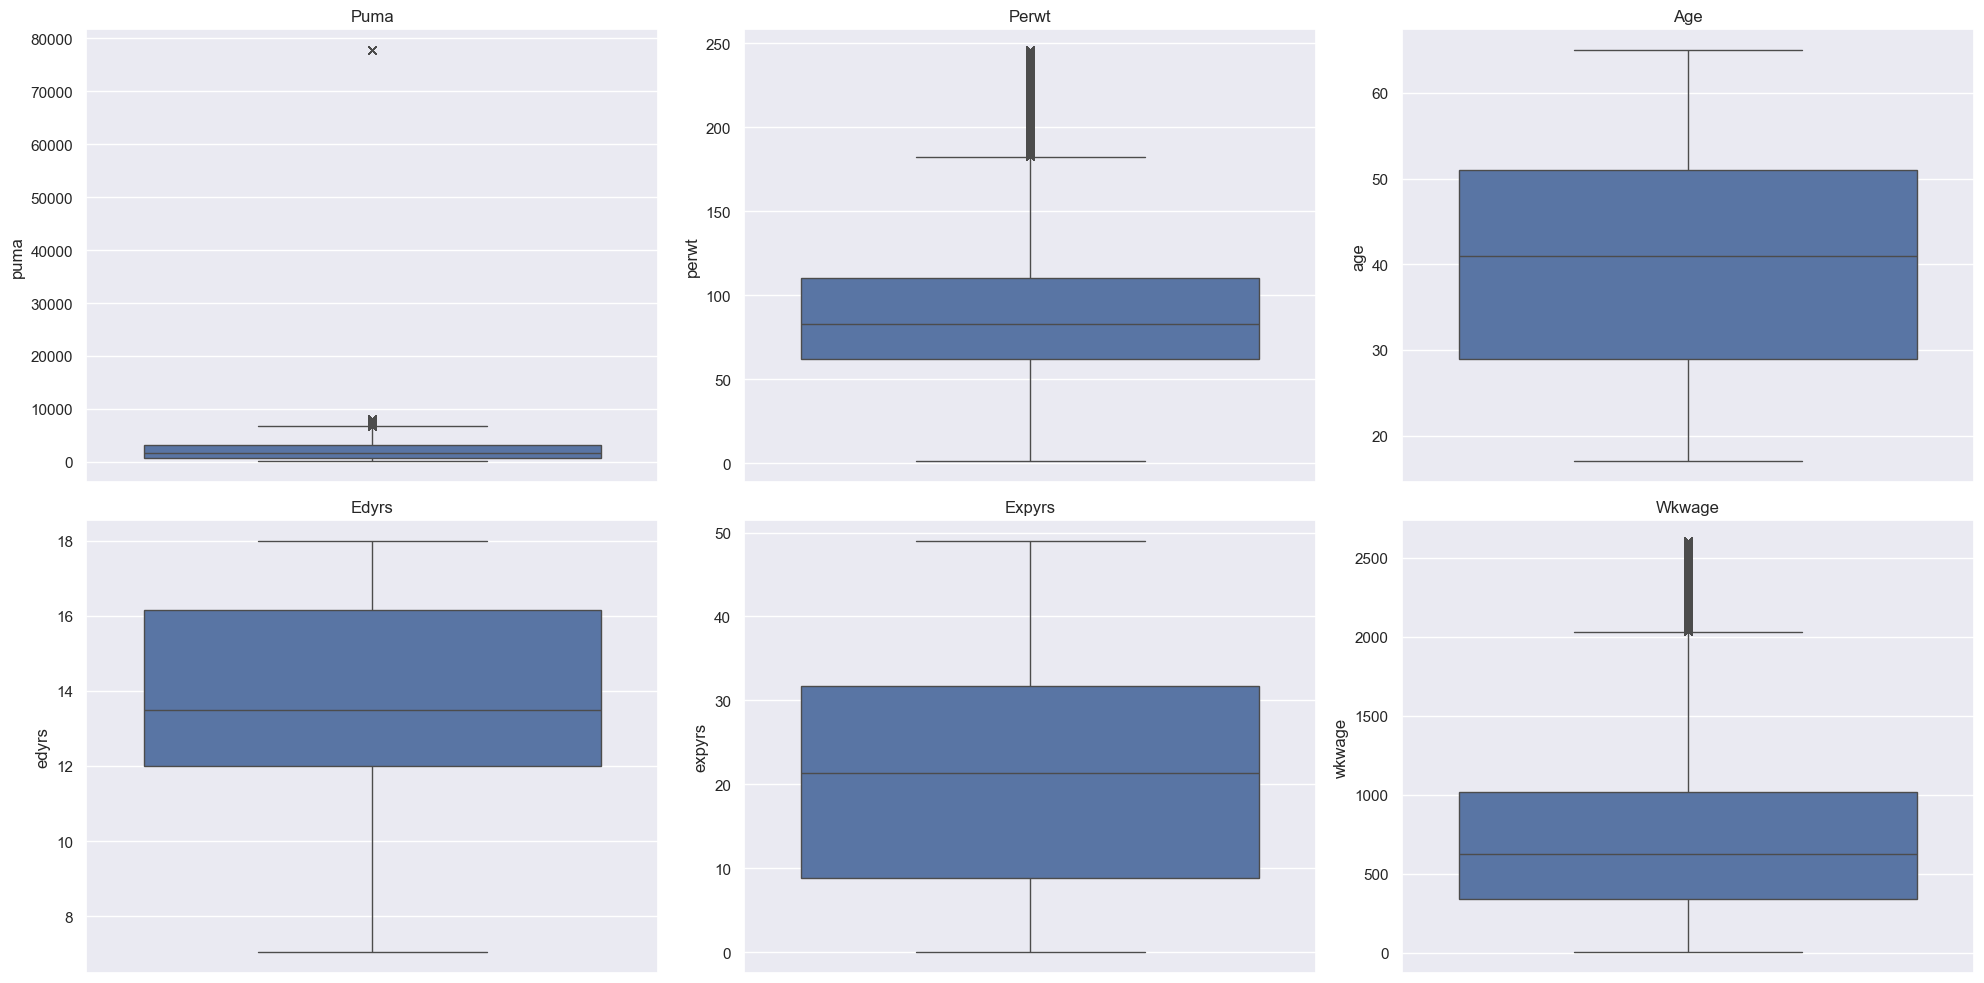

In [27]:
cols = ['edyrs', 'expyrs', 'wkwage', 'perwt']

for col in cols:
    quartiles = df[col].quantile([0.20, 0.80])
    q1 = quartiles.loc[0.20]
    q3 = quartiles.loc[0.80]

    low_bound = q1 - 1.5 * (q3 - q1)
    upp_bound = q3 + 1.5 * (q3 - q1)

    df = df[(df[col] >= low_bound) & (df[col] <= upp_bound)]



fig, axes = plt.subplots(2, 3, figsize=(20, 10))

sns.boxplot(df['puma'], flierprops={"marker": "x"}, ax=axes[0, 0])
axes[0, 0].set_title('Puma')

sns.boxplot(df['perwt'], flierprops={"marker": "x"}, ax=axes[0, 1])
axes[0, 1].set_title('Perwt')

sns.boxplot(df['age'], flierprops={"marker": "x"}, ax=axes[0, 2])
axes[0, 2].set_title('Age')

sns.boxplot(df['edyrs'], flierprops={"marker": "x"}, ax=axes[1, 0])
axes[1, 0].set_title('Edyrs')

sns.boxplot(df['expyrs'], flierprops={"marker": "x"}, ax=axes[1, 1])
axes[1, 1].set_title('Expyrs')

sns.boxplot(df['wkwage'], flierprops={"marker": "x"}, ax=axes[1, 2])
axes[1, 2].set_title('Wkwage')

plt.tight_layout()

plt.show()

Normalize data

In [28]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_values = scaler.fit_transform(df)

df = pd.DataFrame(scaled_values, columns=df.columns)

df


,region,statefip,metaread,puma,perwt,age,female,race_nonwhite,edyrs,occ_managprof,occ_techsalad,occ_service,occ_farm,occ_product,occ_operator,occ_service_np,occ_service_broad,industry,expyrs,wkwage
0,1.000000,0.090909,0.552350,0.032197,0.297959,0.041667,0.0,0.0,0.452142,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.020612,0.034790
1,1.000000,0.090909,0.072650,0.048933,0.367347,0.270833,0.0,0.0,0.452142,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.245102,0.197818
2,1.000000,0.090909,0.724359,0.099154,0.889796,0.083333,1.0,0.0,0.576117,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.033673,0.187282
3,1.000000,0.090909,0.798077,0.084980,0.220408,0.479167,1.0,0.0,0.018232,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.489796,0.051830
4,1.000000,0.090909,0.867521,0.023186,0.195918,0.520833,1.0,0.0,0.453054,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.489796,0.657068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1214392,0.032258,0.636364,0.598291,0.050337,0.987755,0.208333,0.0,1.0,0.596171,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.151633,0.092192
1214393,0.645161,0.418182,0.944444,0.012938,0.436735,0.645833,0.0,0.0,0.656335,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.566735,0.789295
1214394,0.322581,0.290909,0.170940,0.039947,0.371429,0.125000,0.0,0.0,0.656335,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.056531,0.149657
1214395,0.645161,0.418182,0.076923,0.003862,0.269388,0.812500,0.0,0.0,0.970830,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.659592,0.234691


Handling Skewness

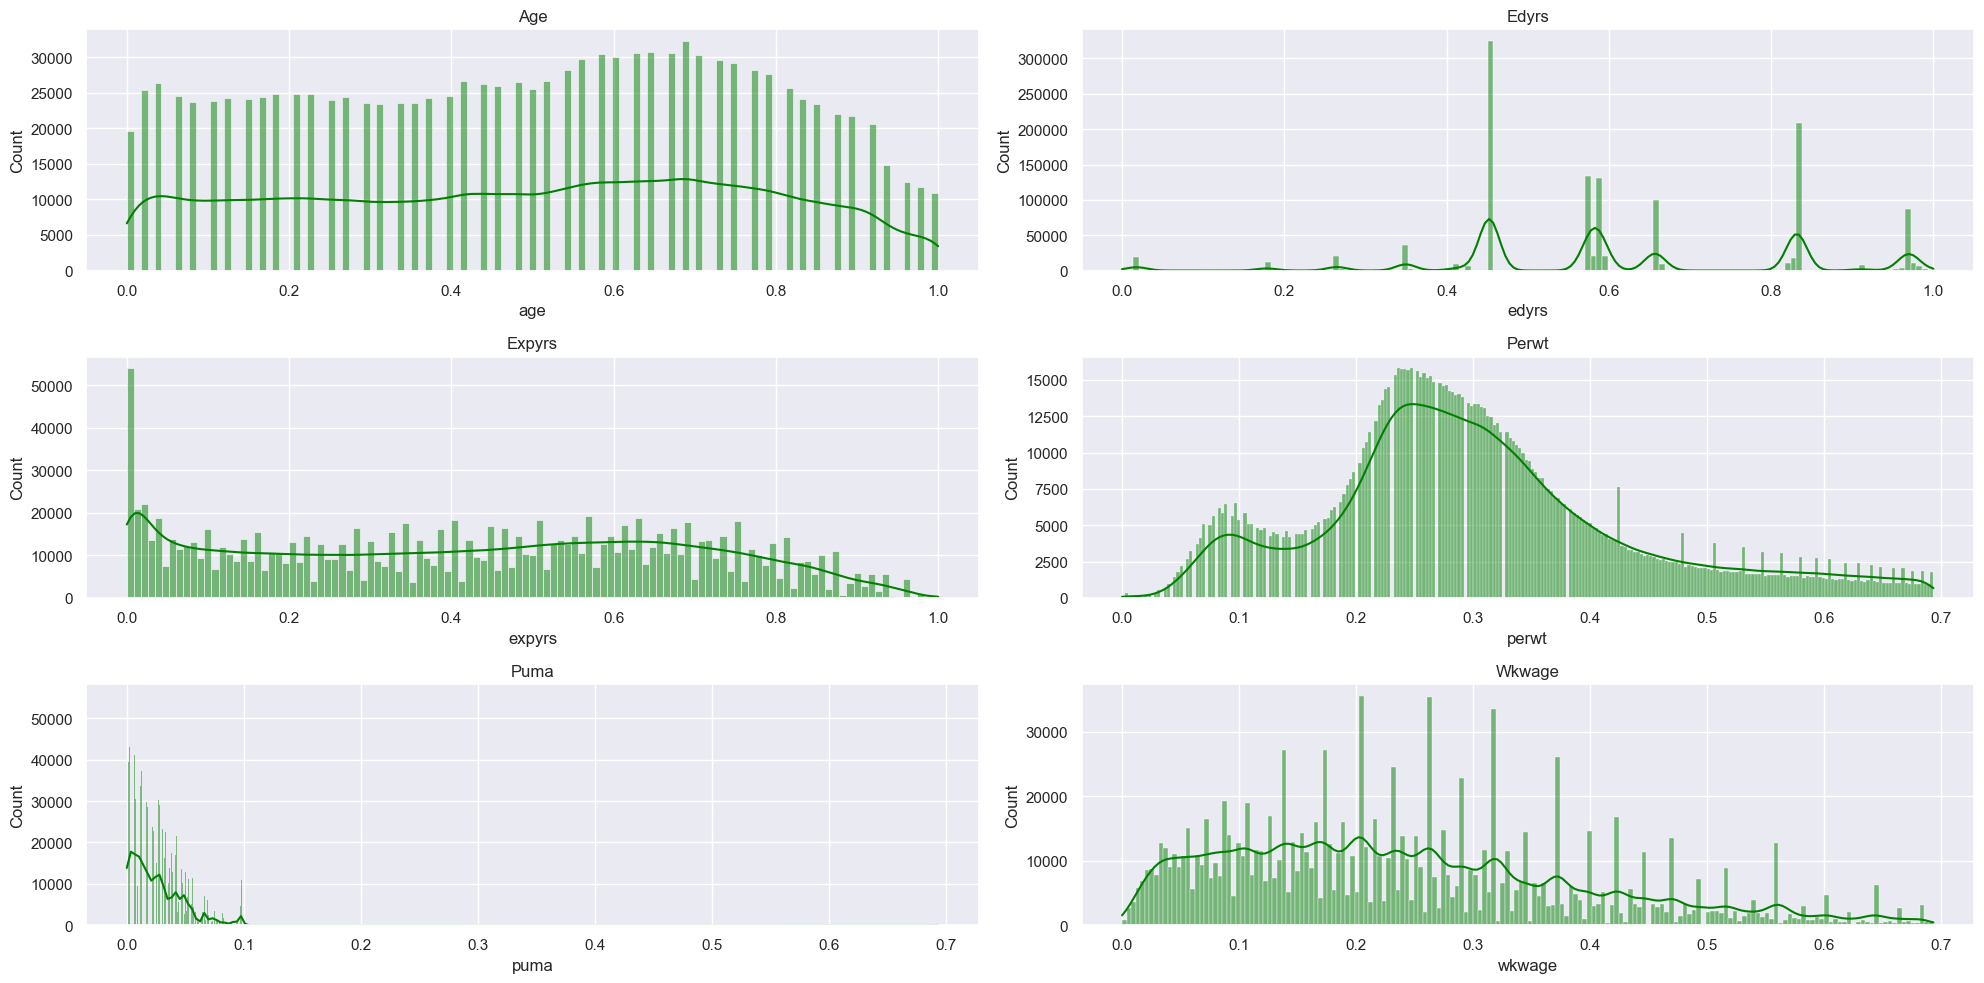

In [29]:
skewed_columns = df.apply(lambda x: skew(x))

skewed_columns = skewed_columns[(skewed_columns > 0.5) | (skewed_columns < -0.5)]

for col in skewed_columns.index:
    if skewed_columns[col] > 0.5:
        df[col] = np.log1p(df[col])
    elif skewed_columns[col] < -0.5:
        df[col] = np.cbrt(df[col])

fig, axes = plt.subplots(3, 2, figsize=(20, 10))

sns.histplot(x=df['age'], ax=axes[0, 0], color='green', kde=True)
axes[0, 0].set_title('Age')

sns.histplot(x=df['edyrs'], ax=axes[0, 1], color='green', kde=True)
axes[0, 1].set_title('Edyrs')

sns.histplot(x=df['expyrs'], ax=axes[1, 0], color='green', kde=True)
axes[1, 0].set_title('Expyrs')

sns.histplot(x=df['perwt'], ax=axes[1, 1], color='green', kde=True)
axes[1, 1].set_title('Perwt')

sns.histplot(x='puma', data=df, ax=axes[2, 0], color='green', kde=True)
axes[2, 0].set_title('Puma')

sns.histplot(x='wkwage', data=df, ax=axes[2, 1], color='green', kde=True)
axes[2, 1].set_title('Wkwage')

plt.tight_layout()

plt.show()


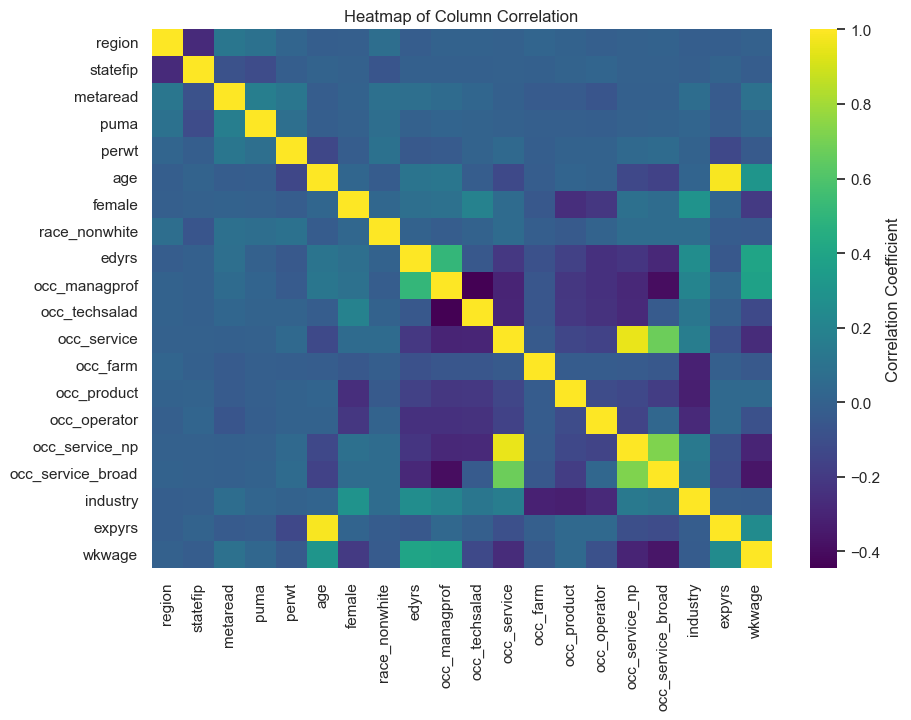

In [30]:
sns.set_theme(rc = {'figure.figsize':(10, 7)})
sns.heatmap(df.corr(), cmap='viridis', fmt='.2f', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Heatmap of Column Correlation')
plt.show()

In [31]:
df = df.drop(columns=['region', 'statefip', 'race_nonwhite', 'puma', 'occ_farm', 'occ_product', 'industry', 'age', 'occ_service'])

Final Correlation Plot

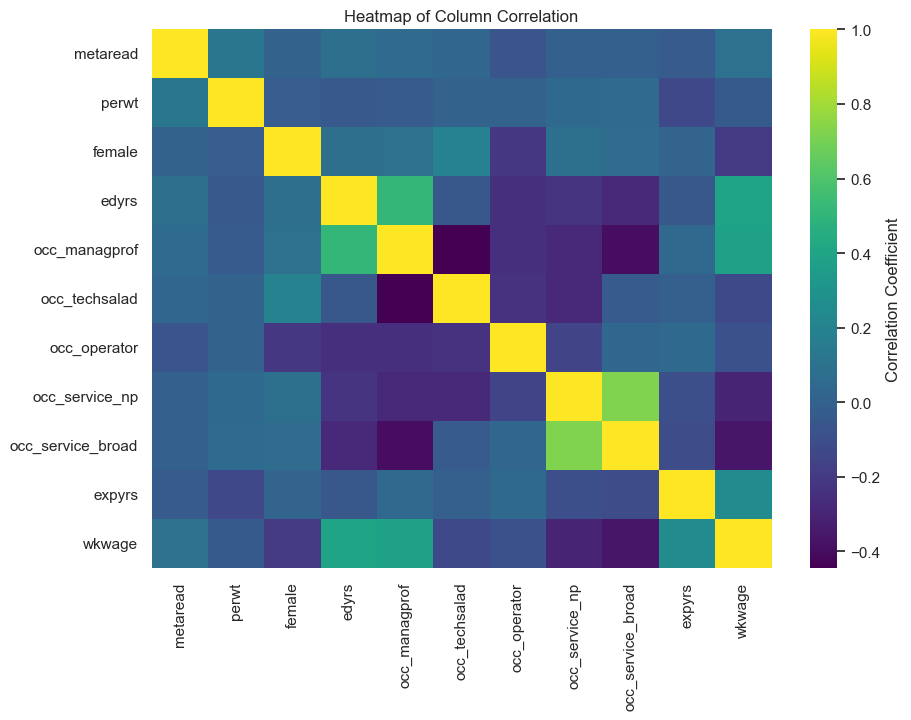

In [32]:
sns.set_theme(rc = {'figure.figsize':(10, 7)})
sns.heatmap(df.corr(), cmap='viridis', fmt='.2f', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Heatmap of Column Correlation')
plt.show()

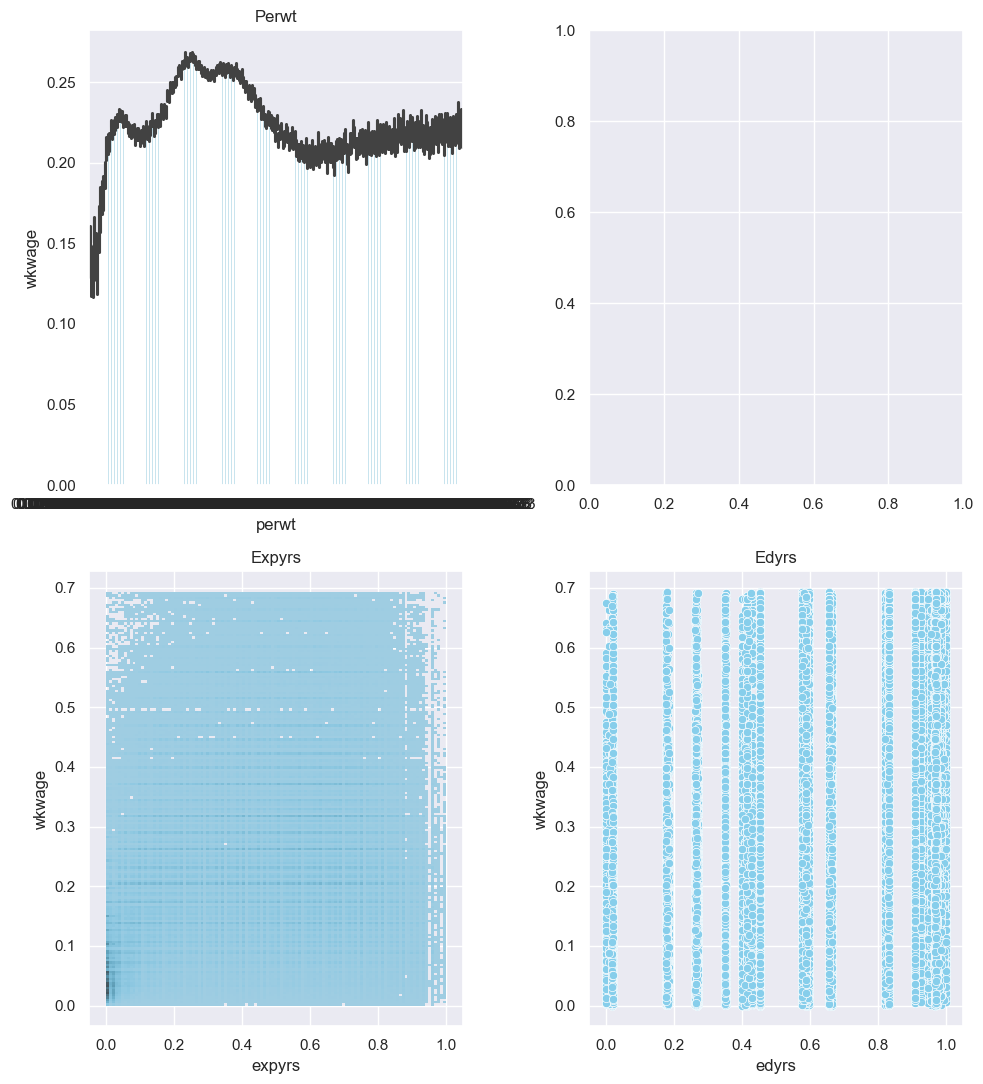

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(10, 11))

sns.barplot(x=df['perwt'], y = df['wkwage'], ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Perwt')

sns.histplot(x=df['expyrs'], y = df['wkwage'], ax=axes[1, 0], color='skyblue')
axes[1, 0].set_title('Expyrs')

sns.scatterplot(x=df['edyrs'], y = df['wkwage'], ax=axes[1, 1], color='skyblue')
axes[1, 1].set_title('Edyrs')


plt.tight_layout()

plt.show()

Model 1

In [34]:
X = df
X = X.drop(columns=['wkwage'])
y = df[['wkwage']]

X = sm.add_constant(X)
ols_model = sm.OLS(y, X).fit()
SST = ((y - y.mean())**2).sum()

print("MSE ", np.mean(ols_model.resid ** 2))
ols_model.summary()

MSE  0.014894657459024012


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 wkwage   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                 6.690e+04
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        23:31:41   Log-Likelihood:             8.3118e+05
No. Observations:             1214397   AIC:                        -1.662e+06
Df Residuals:                 1214386   BIC:                        -1.662e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0930      0.001    156.291      0.000       0.092       0.094
metaread              0.0314      0.000     88.709      0.000       0.031       0.032
perwt                 0.0052      0.001      6.111      0.000       0.004       0.007
female               -0.0671      0.000   -279.138      0.000      -0.068      -0.067
edyrs                 0.2078      0.001    321.247      0.000       0.206       0.209
occ_managprof         0.0578      0.001     92.919      0.000       0.057       0.059
occ_techsalad        -0.0289      0.001    -47.624      0.000      -0.030      -0.028
occ_operator         -0.0448      0.001    -65.247      0.000      -0.046      -0.043
occ_service_np       -0.0599      0.001    -69.222      0.000      -0.062      -0.058
occ_service_broad    -0.0624      0.001   -108.949      0.000      -0.064      -0.061
expyrs                0.1353      0.000    321.696      0.000       0.134       0.136
==============================================================================
Omnibus:                    40918.218   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49647.081
Skew:                           0.405   Prob(JB):                         0.00
Kurtosis:                       3.570   Cond. No.                         16.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

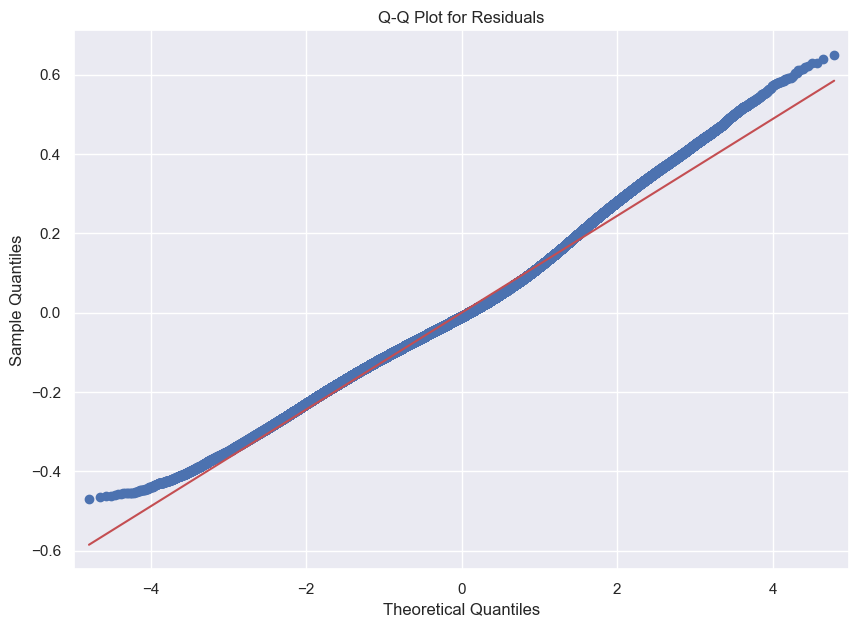

In [35]:
sm.qqplot(ols_model.resid, line='s')
plt.title('Q-Q Plot for Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

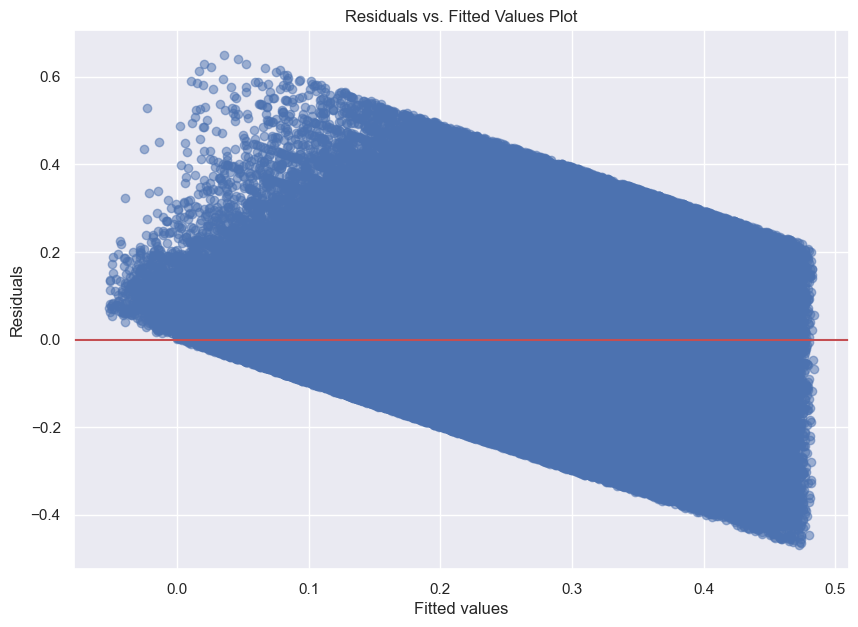

In [36]:
plt.scatter(ols_model.fittedvalues, ols_model.resid, alpha=0.5)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values Plot")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

Model 2

In [37]:
from statsmodels.stats.outliers_influence import OLSInfluence

influence = OLSInfluence(ols_model)

cook_distances = influence.cooks_distance[0]
threshold = 1 * np.mean(cook_distances)
influential_points = df[cook_distances > threshold]
cleaned_df = df[cook_distances <= threshold]


X = cleaned_df
X = X.drop(columns=['wkwage'])
y = cleaned_df[['wkwage']]

X = sm.add_constant(X)
ols_model = sm.OLS(y, X).fit()

print("MSE ", np.mean(ols_model.resid ** 2))
ols_model.summary()

MSE  0.004355862315703151


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 wkwage   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                 1.780e+05
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        23:31:43   Log-Likelihood:             1.1273e+06
No. Observations:              867709   AIC:                        -2.255e+06
Df Residuals:                  867698   BIC:                        -2.254e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0798      0.000    203.324      0.000       0.079       0.081
metaread              0.0315      0.000    137.225      0.000       0.031       0.032
perwt                 0.0069      0.001     12.651      0.000       0.006       0.008
female               -0.0649      0.000   -415.102      0.000      -0.065      -0.065
edyrs                 0.2121      0.000    482.230      0.000       0.211       0.213
occ_managprof         0.0625      0.000    149.065      0.000       0.062       0.063
occ_techsalad        -0.0356      0.000    -88.730      0.000      -0.036      -0.035
occ_operator         -0.0453      0.000    -99.413      0.000      -0.046      -0.044
occ_service_np       -0.0599      0.001   -107.133      0.000      -0.061      -0.059
occ_service_broad    -0.0639      0.000   -169.988      0.000      -0.065      -0.063
expyrs                0.1433      0.000    522.258      0.000       0.143       0.144
==============================================================================
Omnibus:                    42976.321   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19227.678
Skew:                           0.142   Prob(JB):                         0.00
Kurtosis:                       2.328   Cond. No.                         17.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

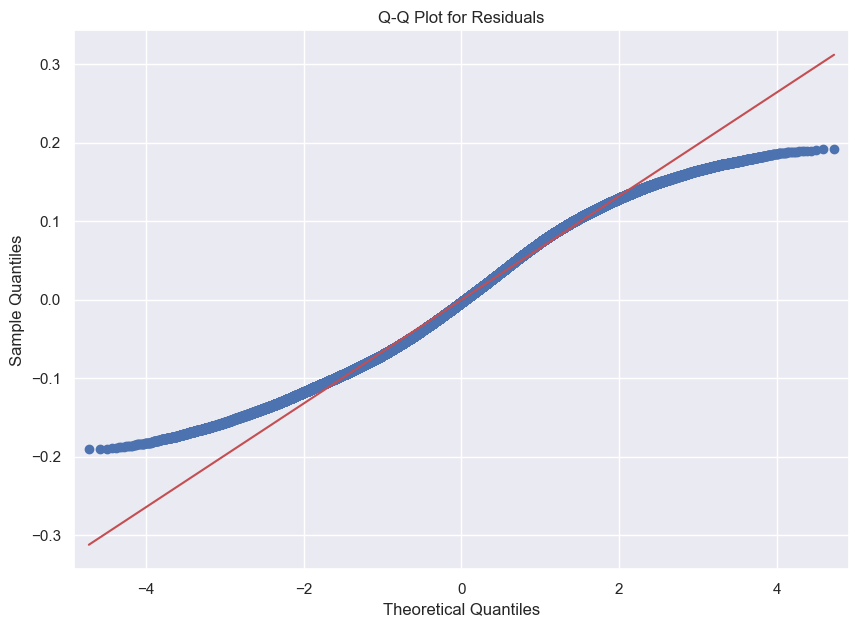

In [38]:
sm.qqplot(ols_model.resid, line='s')
plt.title('Q-Q Plot for Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

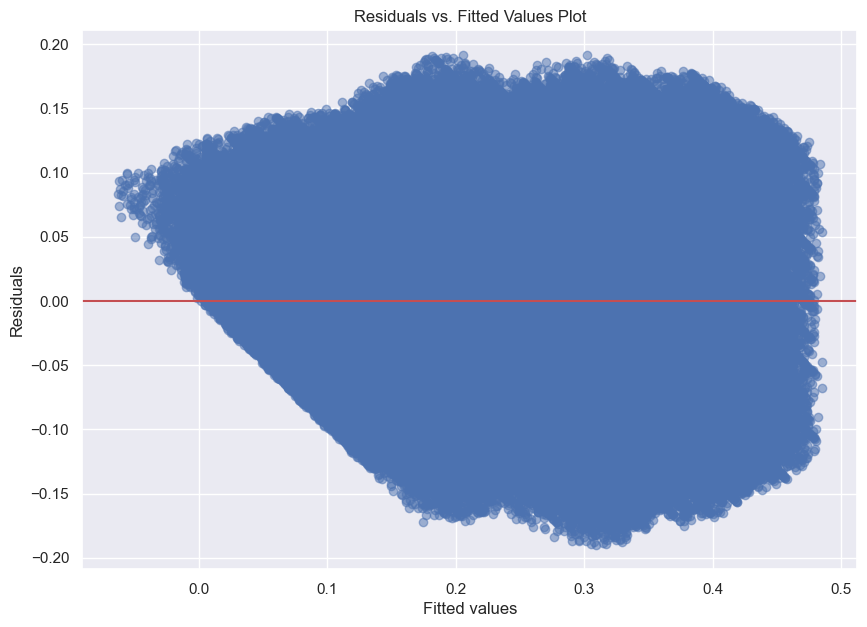

In [39]:
plt.scatter(ols_model.fittedvalues, ols_model.resid, alpha=0.5)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values Plot")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

Model 3

In [40]:
from sklearn.model_selection import train_test_split

X = cleaned_df
X = X.drop(columns=['wkwage'])
y = np.sqrt(cleaned_df[['wkwage']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

ols_model = sm.OLS(y_train, X_train).fit()

print("MSE ", np.mean(ols_model.resid ** 2))
ols_model.summary()

MSE  0.005562968401567182


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 wkwage   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                 1.444e+05
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        23:31:45   Log-Likelihood:             8.1695e+05
No. Observations:              694167   AIC:                        -1.634e+06
Df Residuals:                  694156   BIC:                        -1.634e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2946      0.000    593.974      0.000       0.294       0.296
metaread              0.0344      0.000    118.676      0.000       0.034       0.035
perwt                 0.0129      0.001     18.594      0.000       0.012       0.014
female               -0.0698      0.000   -353.443      0.000      -0.070      -0.069
edyrs                 0.2371      0.001    426.661      0.000       0.236       0.238
occ_managprof         0.0501      0.001     94.590      0.000       0.049       0.051
occ_techsalad        -0.0459      0.001    -90.409      0.000      -0.047      -0.045
occ_operator         -0.0450      0.001    -78.195      0.000      -0.046      -0.044
occ_service_np       -0.0772      0.001   -109.264      0.000      -0.079      -0.076
occ_service_broad    -0.0870      0.000   -183.331      0.000      -0.088      -0.086
expyrs                0.1734      0.000    500.197      0.000       0.173       0.174
==============================================================================
Omnibus:                    17377.308   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10354.763
Skew:                          -0.148   Prob(JB):                         0.00
Kurtosis:                       2.480   Cond. No.                         17.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Analyszing Final Model Results

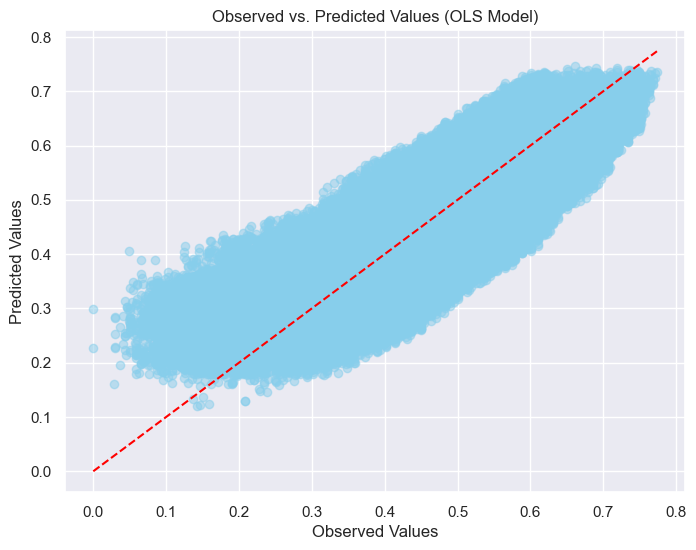

In [41]:
predicted_values = ols_model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, predicted_values, color='skyblue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red') 
plt.title('Observed vs. Predicted Values (OLS Model)')
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

In [42]:
mae = np.mean(np.abs(np.array(y_test['wkwage']) - np.array(predicted_values)))

mse = np.mean((np.array(y_test['wkwage']) - np.array(predicted_values))**2)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 0.061567272852005965
Mean Squared Error (MSE): 0.005557622084732589
Root Mean Squared Error (RMSE): 0.07454946066023944


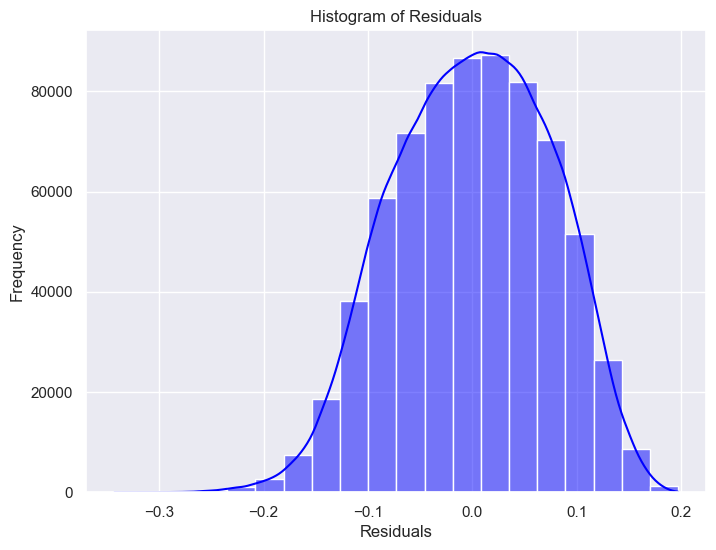

In [43]:
plt.figure(figsize=(8, 6))
sns.histplot(ols_model.resid, bins=20, color='blue', kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

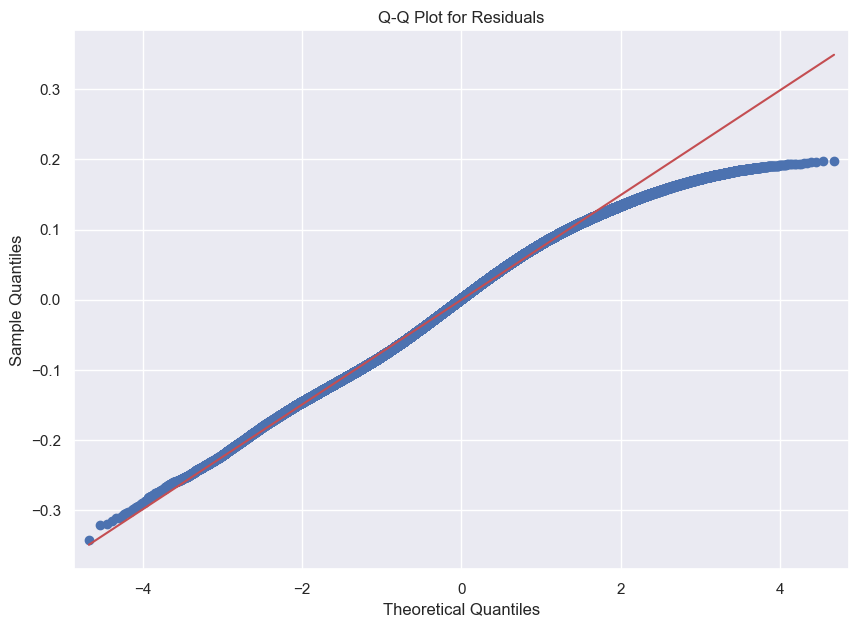

In [44]:
sm.qqplot(ols_model.resid, line='s')
plt.title('Q-Q Plot for Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

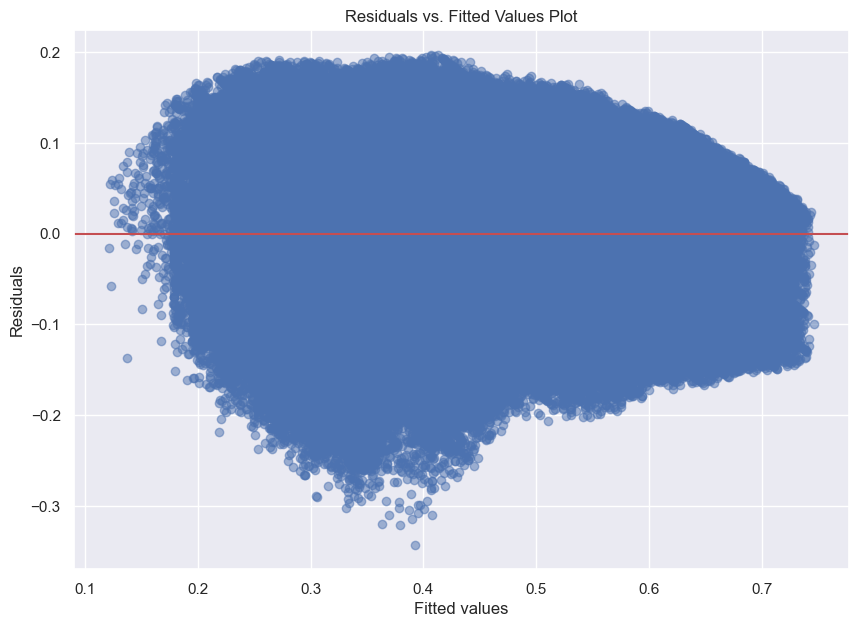

In [45]:
plt.scatter(ols_model.fittedvalues, ols_model.resid, alpha=0.5)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values Plot")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()